In [1]:
from utils import *

### Adapative Thresholding

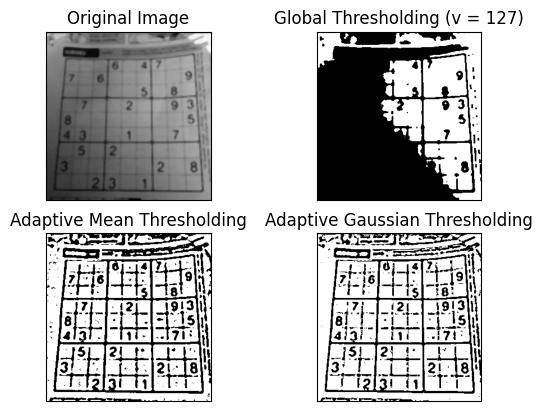

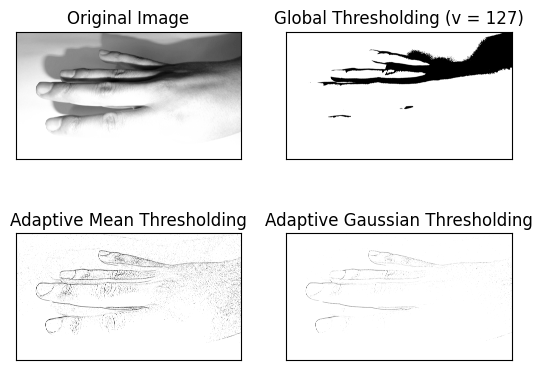

In [5]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
def ad_threshold(path):
    img = cv.imread(path, cv.IMREAD_GRAYSCALE)
    assert img is not None, "file could not be read, check with os.path.exists()"
    img = cv.medianBlur(img,5)
    ret,th1 = cv.threshold(img,127,255,cv.THRESH_BINARY)
    th2 = cv.adaptiveThreshold(img,255,cv.ADAPTIVE_THRESH_MEAN_C,\
                cv.THRESH_BINARY,11,2)
    th3 = cv.adaptiveThreshold(img,255,cv.ADAPTIVE_THRESH_GAUSSIAN_C,\
                cv.THRESH_BINARY,11,2)
    titles = ['Original Image', 'Global Thresholding (v = 127)',
                'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
    images = [img, th1, th2, th3]
    for i in range(4):
        plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
        plt.title(titles[i])
        plt.xticks([]),plt.yticks([])
    plt.show()

ad_threshold('./Test Algorithms images/threshold.png')
ad_threshold('../data/men/4/4_men (13).JPG')




#### Otsuo's threshold

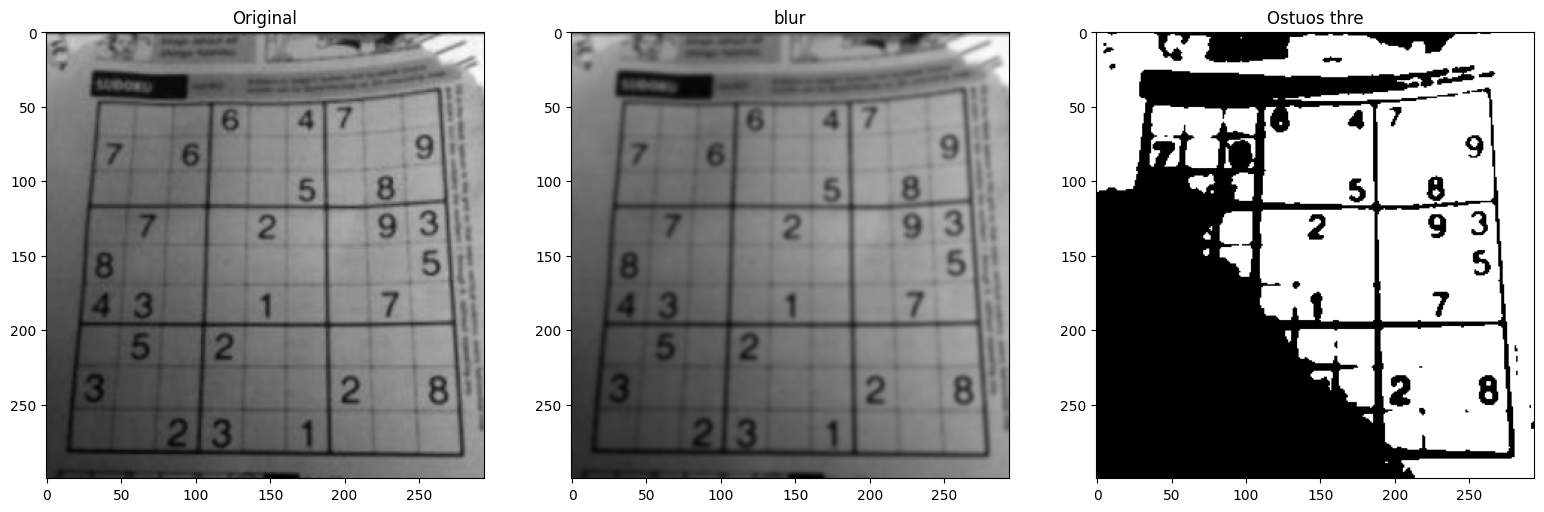

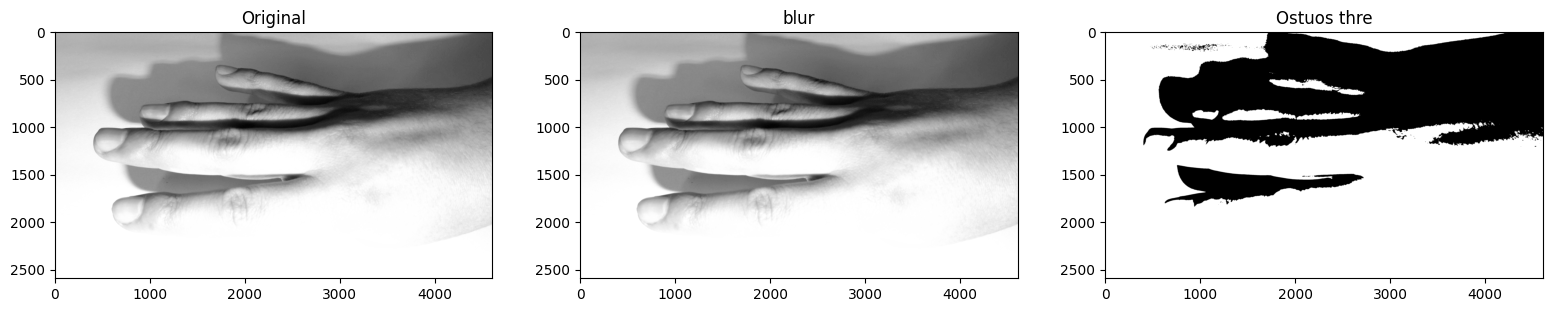

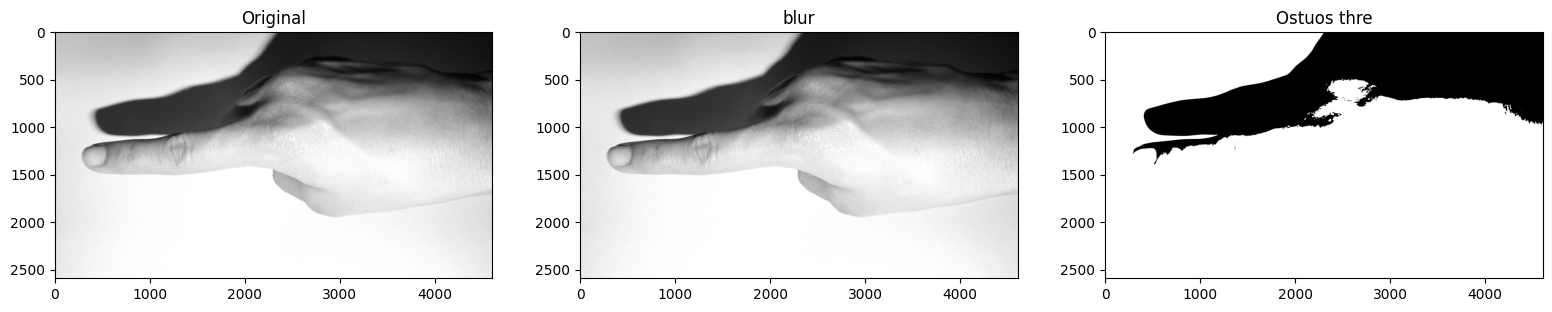

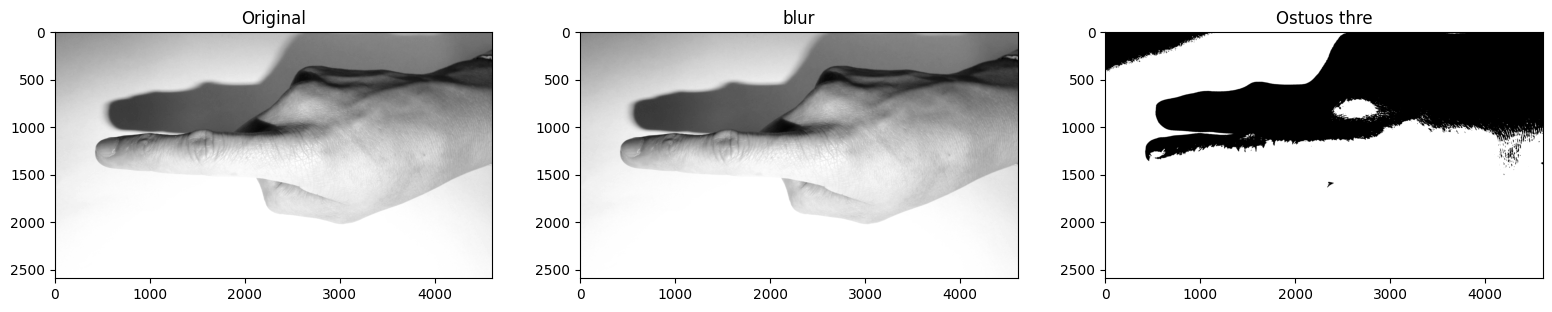

In [9]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
def otsu_th(path):
    img = cv.imread(path, cv.IMREAD_GRAYSCALE)
    assert img is not None, "file could not be read, check with os.path.exists()"
    # global thresholding
    # ret1,th1 = cv.threshold(img,127,255,cv.THRESH_BINARY)
    # Otsu's thresholding
    # ret2,th2 = cv.threshold(img,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
    # Otsu's thresholding after Gaussian filtering
    blur = cv.GaussianBlur(img,(5,5),0)
    ret3,th3 = cv.threshold(blur,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
    # plot all the images and their histograms
    # images = [img, 0, th1,
    #         img, 0, th2,
    #         blur, 0, th3]
    # titles = ['Original Noisy Image','Histogram','Global Thresholding (v=127)',
    #         'Original Noisy Image','Histogram',"Otsu's Thresholding",
    #         'Gaussian filtered Image','Histogram',"Otsu's Thresholding"]
    # for i in range(3):
    #     plt.subplot(3,3,i*3+1),plt.imshow(images[i*3],'gray')
    #     plt.title(titles[i*3]), plt.xticks([]), plt.yticks([])
    #     plt.subplot(3,3,i*3+2),plt.hist(images[i*3].ravel(),256)
    #     plt.title(titles[i*3+1]), plt.xticks([]), plt.yticks([])
    #     plt.subplot(3,3,i*3+3),plt.imshow(images[i*3+2],'gray')
    #     plt.title(titles[i*3+2]), plt.xticks([]), plt.yticks([])
    # plt.show()

    show_images([img,blur,th3],['Original','blur','Ostuos thre'])


otsu_th('./Test Algorithms images/threshold.png')
otsu_th('../data/men/4/4_men (13).JPG')
otsu_th('../data/men/1/1_men (31).JPG')
otsu_th('../data/men/1/1_men (67).JPG')



In [11]:
#Trail 

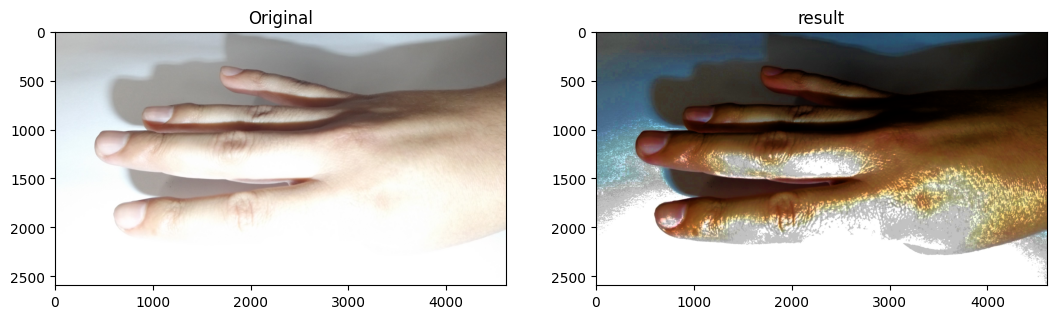

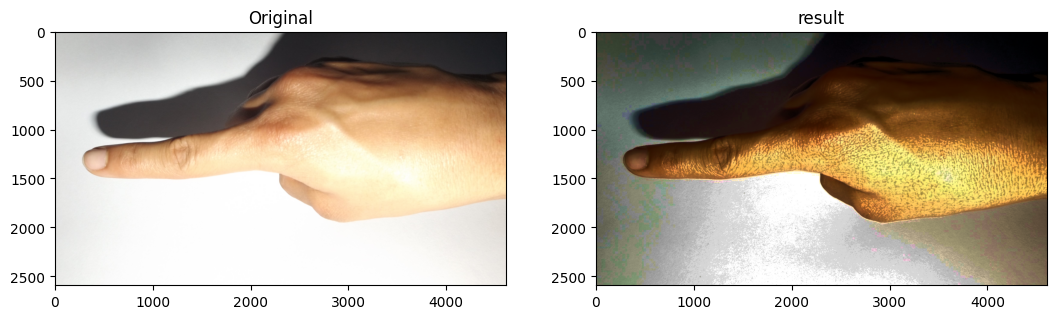

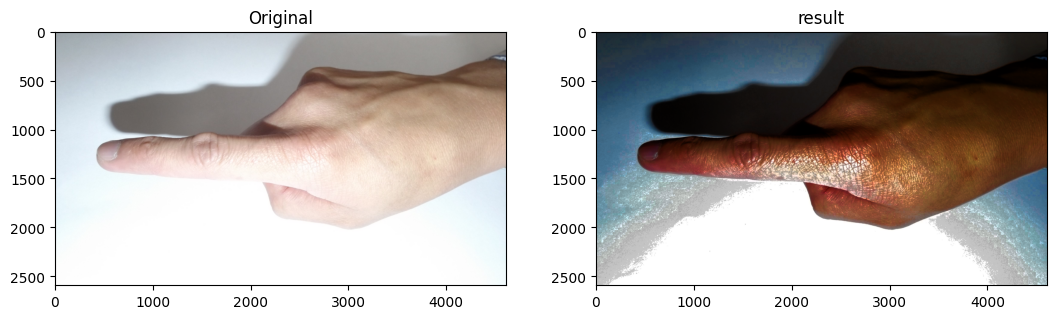

In [22]:
from preprocessing import preprocessing2
#By applying histogram equalisation directly on the channels of color images (RGB)
#  I didn't obtain better results. Therefore, I coverted the color space of the image into YUV which
# separates the intensity value from the color components. I have equalised the Y channel and converted
# back to RGB. This makes the picture have a much better contrast and doesn't disturb the color of the image.


def eq_Y(path):
    I = cv2.imread(path)

    #The following code extracts the Y channel, apply the histm equalization and convert it back to RGB
    YUV= cv2.cvtColor(I,cv2.COLOR_BGR2HSV)
    YUV_res=np.copy(YUV)
    YUV_res[:,:,2]=cv2.equalizeHist(YUV_res[:,:,2])
    YUV_res[:,:,1]=cv2.equalizeHist(YUV_res[:,:,1])


    # convert the YUV image back to RGB format
    img_output = cv2.cvtColor(YUV_res, cv2.COLOR_HSV2BGR)

    show_images([cv2.cvtColor(I, cv2.COLOR_BGR2RGB),cv2.cvtColor(img_output, cv2.COLOR_BGR2RGB)],
                ['Original',"result"])
    return img_output

res=eq_Y('../data/men/4/4_men (13).JPG')
I = cv2.imread('../data/men/1/1_men (67).JPG')

# preprocessing2(res,name='4_men (13)',debug=True)
res=eq_Y('../data/men/1/1_men (31).JPG')
# preprocessing2(res,name='1_men (31)',debug=True)
res=eq_Y('../data/men/1/1_men (67).JPG')
# preprocessing2(res,name='1_men (67)',debug=True)



In [ ]:
    
import cv2
import numpy as np

def extractSkin2(image,name="",debug=False):  #REPEATED
    
    # Converting from BGR Colours Space to HSV
    img = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    # Defining HSV Threadholds
    lower_threshold = np.array([0, 48, 80], dtype=np.uint8)
    upper_threshold = np.array([20, 255, 255], dtype=np.uint8)

    # Single Channel mask,denoting presence of colours in the about threshold
    skinMask_b = cv2.inRange(img, lower_threshold, upper_threshold)

    # Cleaning up mask using Gaussian Filter
    skinMask = cv2.GaussianBlur(skinMask_b, (3, 3), 0)
    if(debug):
        # Extracting skin from the threshold mask
        skin = cv2.bitwise_and(img, img, mask=skinMask)

        # Return the Skin image
        skin=cv2.cvtColor(skin, cv2.COLOR_HSV2RGB)
        show_images([ cv2.cvtColor(image, cv2.COLOR_BGR2RGB),skinMask_b,skinMask,skin],['2_men (11).JPG','skinMask_b','skinMask','skin'])


    return  skinMask

# Load the image
img = cv2.imread('../data/men/2/2_men (11).JPG')

skinMask=extractSkin2(img,name='2_men (11)',debug=True)


# Apply Closing =(Erode+Dilate) to remove 
kernel = np.ones((3, 3), np.uint8)
skinMask_close = cv2.morphologyEx(skinMask, cv2.MORPH_ERODE, kernel, iterations=2) #erode
skinMask_close = cv2.morphologyEx(skinMask_close, cv2.MORPH_DILATE, kernel, iterations=2) #Dilate Back  



# Find Contours
contours, hierarchy = cv2.findContours(
    skinMask_close, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)


img_contours = np.copy(img)
cv2.drawContours(img_contours, contours, -1, (0, 255, 0), 3)

# Get Largest Contour
sorted_contours = sorted(contours, key=cv2.contourArea, reverse=True)
largest_contour = sorted_contours[0]

largest_contour_img = np.copy(img)
cv2.drawContours(largest_contour_img,
                    largest_contour, -1, (255, 0, 0), 10)

# Binary_img_contours[Result]
hand_contour = np.zeros((np.shape(img)[0], np.shape(img)[1], 1))
cv2.drawContours(hand_contour, largest_contour, -1, 255, 10)

show_images([cv2.cvtColor(img, cv2.COLOR_BGR2RGB),skinMask,
            skinMask_close, img_contours, largest_contour_img, hand_contour],
            ['RGB'+'2_men (11)', 'skinMask', 'skinMask closing','Contours', 'Largest Contour', 'hand_contour'])






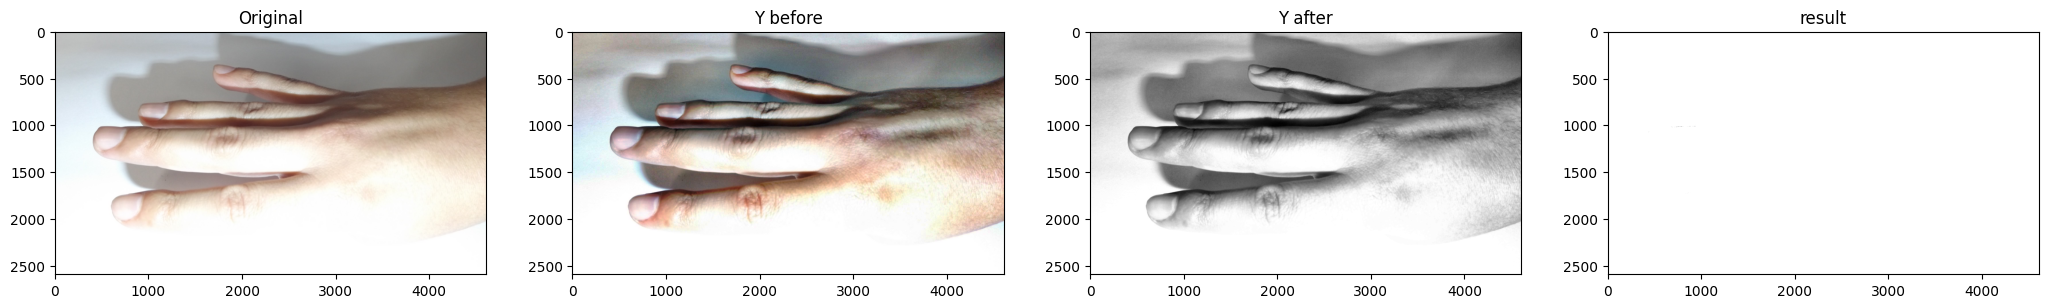

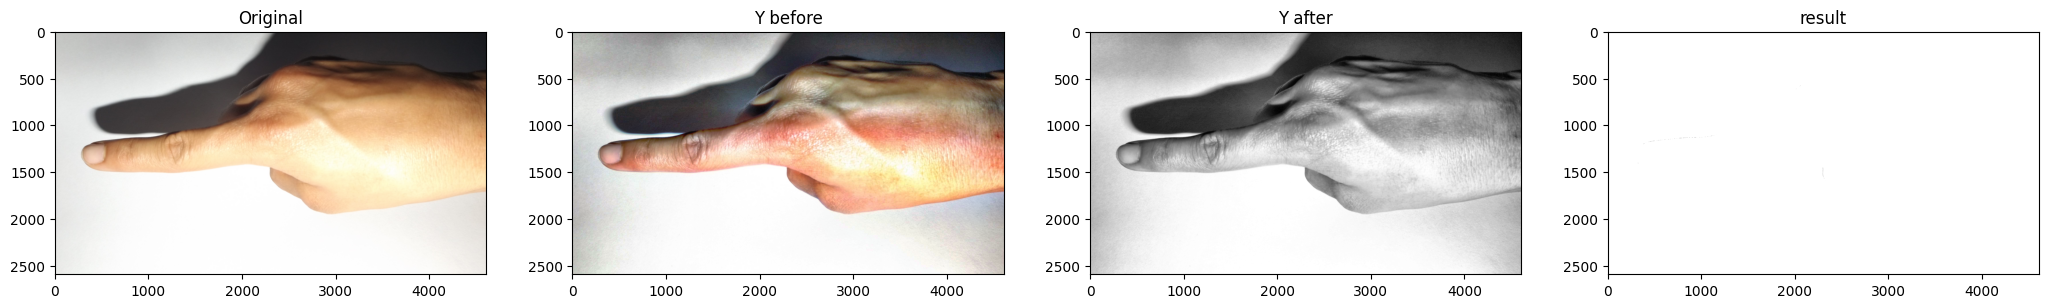

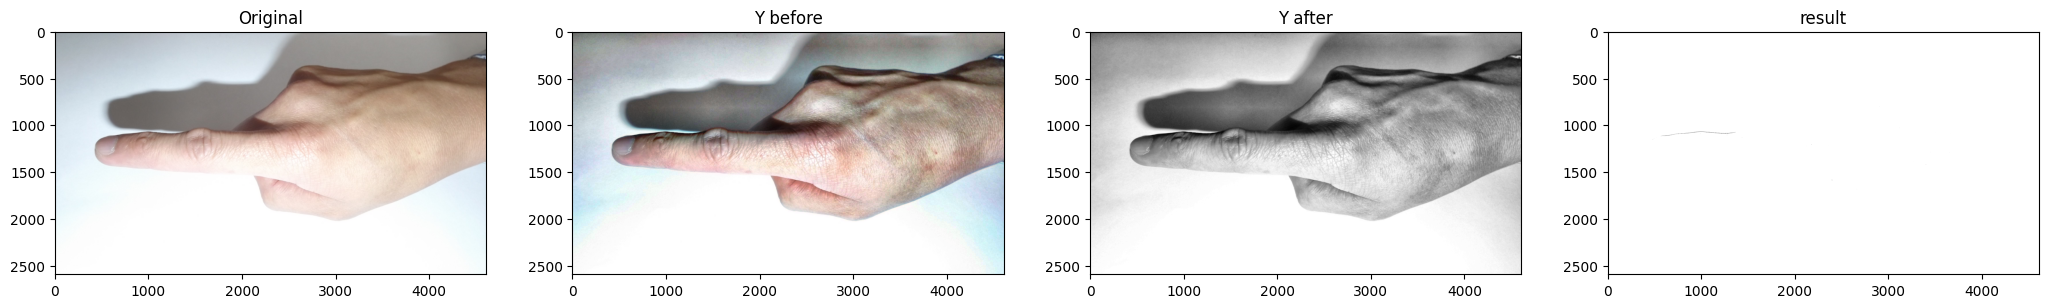

In [19]:
def clache_Y(path):
    I = cv2.imread(path)

    RGB = cv2.cvtColor(I, cv2.COLOR_BGR2RGB)#convert to RGB
    R,G,B = cv2.split(RGB)
    #Create a CLAHE object: The image is divided into small block 8x8 which they are equalized as usual.
    clahe = cv2.createCLAHE(clipLimit=2.5, tileGridSize=(8,8))
    #Applying this method to each channel of the color image
    output_2R = clahe.apply(R)
    output_2G = clahe.apply(G)
    output_2B = clahe.apply(B)

    #mergin each channel back to one
    img_output = cv2.merge((output_2R,output_2G,output_2B))
    #coverting image from RGB to Grayscale
    eq=cv2.cvtColor(img_output,cv2.COLOR_RGB2GRAY)
    #Using image thresholding to classify pixels as dark or light
    #This method provides changes in illumination and the contrast of the image is improved.
    gauss = cv2.adaptiveThreshold(eq, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 17, 45)


    show_images([cv2.cvtColor(I, cv2.COLOR_BGR2RGB),img_output,eq,gauss],
                ['Original','Y before','Y after',"result"])
    
    return cv2.cvtColor(img_output, cv2.COLOR_RGB2BGR)

res=clache_Y('../data/men/4/4_men (13).JPG')
# preprocessing2(res,name='4_men (13)',debug=True)
res=clache_Y('../data/men/1/1_men (31).JPG')
# preprocessing2(res,name='1_men (31)',debug=True)
res=clache_Y('../data/men/1/1_men (67).JPG')
# preprocessing2(res,name='1_men (67)',debug=True)

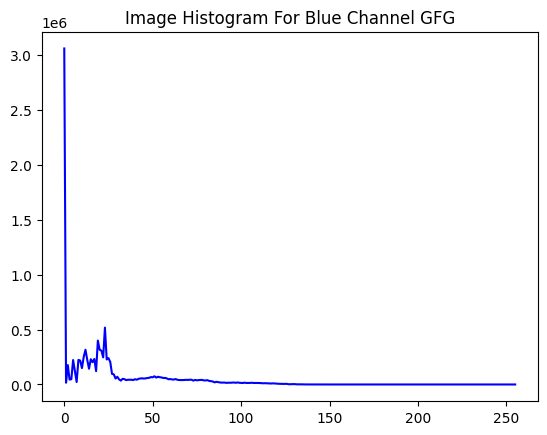

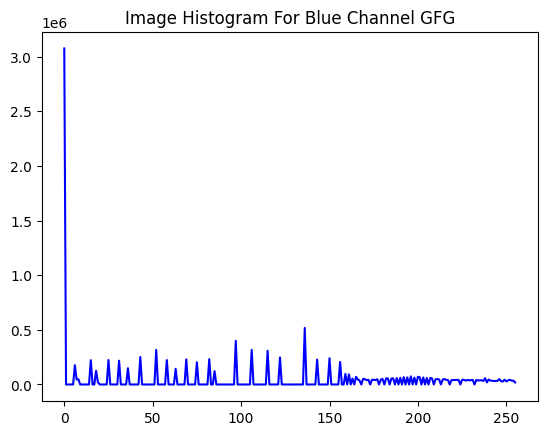

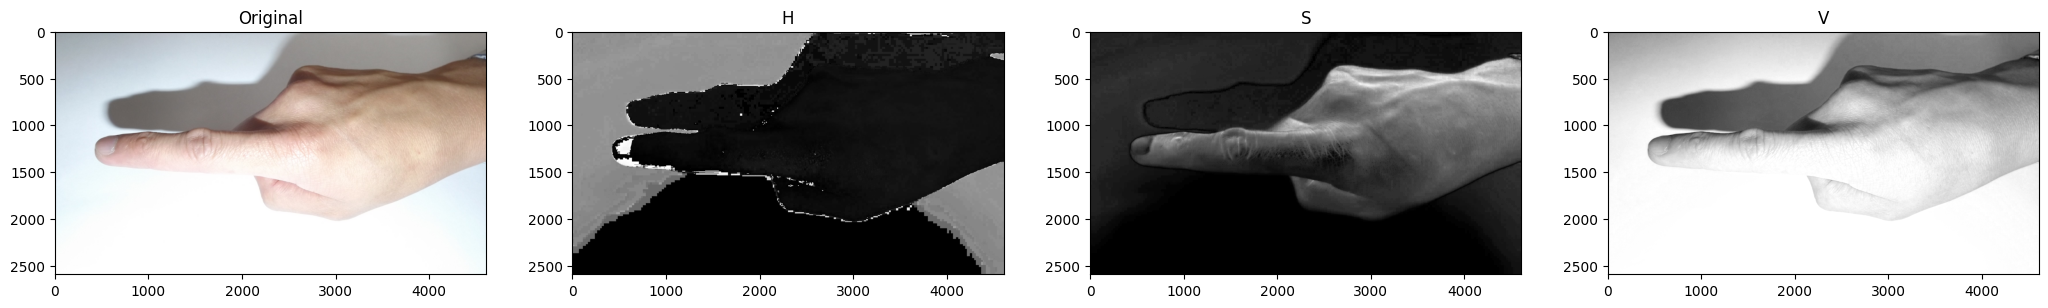

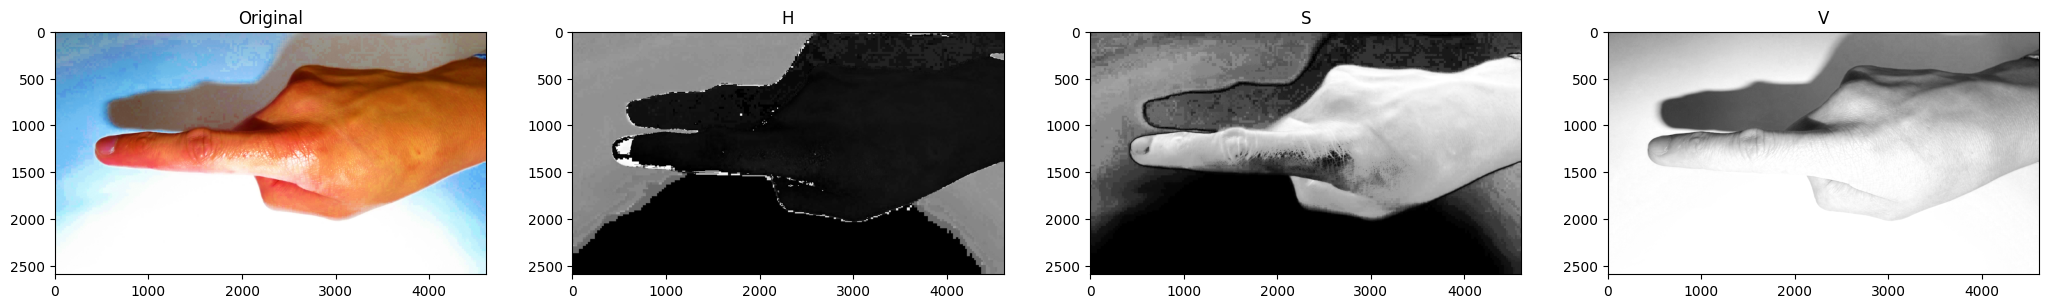

In [33]:
img= cv2.imread('../data/men/1/1_men (67).JPG')
img_HSV = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

# computing the histogram of the blue channel of the image
hist = cv2.calcHist([img_HSV[:,:,1]],[0],None,[256],[0,256])
  
# plot the above computed histogram
plt.plot(hist, color='b')
plt.title('Image Histogram For Blue Channel GFG')
plt.show()

img_HSV_eq=np.copy(img_HSV)
img_HSV_eq[:,:,1]=cv2.equalizeHist(img_HSV_eq[:,:,1])

# computing the histogram of the blue channel of the image
hist = cv2.calcHist([img_HSV_eq[:,:,1]],[0],None,[256],[0,256])
  
# plot the above computed histogram
plt.plot(hist, color='b')
plt.title('Image Histogram For Blue Channel GFG')
plt.show()

show_images([cv2.cvtColor(img, cv2.COLOR_BGR2RGB),img_HSV[:,:,0],img_HSV[:,:,1],img_HSV[:,:,2]],
        ['Original','H','S',"V"])


show_images([cv2.cvtColor(img_HSV_eq, cv2.COLOR_HSV2RGB),img_HSV_eq[:,:,0],img_HSV_eq[:,:,1],img_HSV_eq[:,:,2]],
        ['Original','H','S',"V"])

# img_HSV_eq[:,:,2]-=100

# img_HSV_eq[:,:,2][img_HSV_eq[:,:,2]<0]=0
# show_images([cv2.cvtColor(img_HSV_eq, cv2.COLOR_HSV2RGB)])

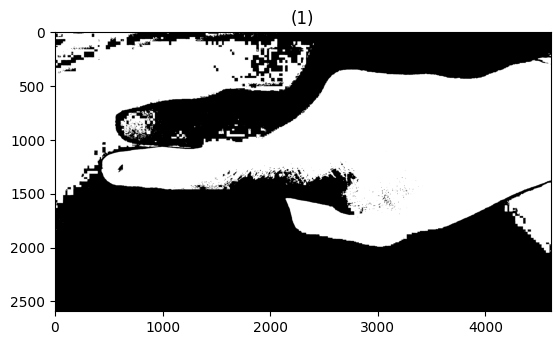

In [38]:
# Otsu's thresholding after Gaussian filtering
blur = cv.GaussianBlur(img_HSV_eq[:,:,1],(5,5),0)
ret3,th3 = cv.threshold(blur,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)

show_images([th3])


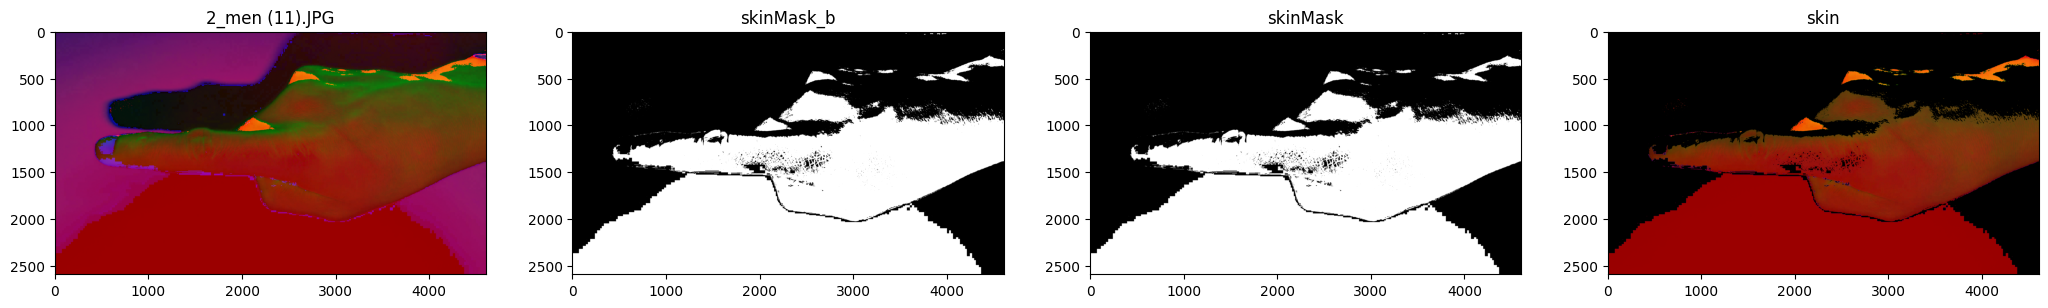

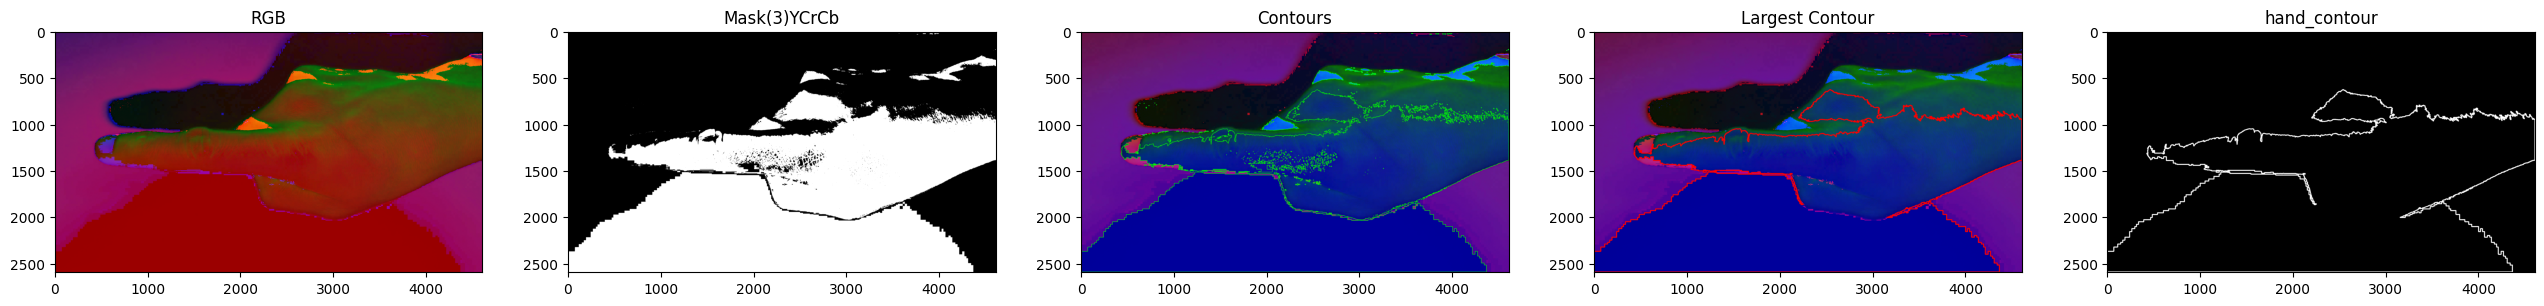

array([[[  0.],
        [  0.],
        [  0.],
        ...,
        [  0.],
        [  0.],
        [  0.]],

       [[  0.],
        [  0.],
        [  0.],
        ...,
        [  0.],
        [  0.],
        [  0.]],

       [[  0.],
        [  0.],
        [  0.],
        ...,
        [  0.],
        [  0.],
        [  0.]],

       ...,

       [[255.],
        [255.],
        [255.],
        ...,
        [  0.],
        [  0.],
        [  0.]],

       [[255.],
        [255.],
        [255.],
        ...,
        [  0.],
        [  0.],
        [  0.]],

       [[255.],
        [255.],
        [255.],
        ...,
        [  0.],
        [  0.],
        [  0.]]])

In [31]:
from preprocessing import preprocessing2

preprocessing2(img_HSV_eq,debug=True)